In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Take cleaned and selected dummy variables and combine them with the class feature from the full set
data = pd.read_csv('cleaned_dummy_dataset.csv')
data_full = pd.read_csv('soybean_csv.csv')
data['Class'] = data_full['class']
#data.drop('Unnamed: 0', inplace=True)
data = data.loc[:,'plant-growth_abnorm':]
data.tail()

,plant-growth_abnorm,leafspots-halo_no-yellow-halos,leafspots-marg_w-s-marg,leafspot-size_gt-1/8,leaf-mild_absent,stem-cankers_absent,canker-lesion_dk-brown-blk,fruiting-bodies_absent,fruiting-bodies_present,external-decay_absent,int-discolor_brown,int-discolor_none,fruit-pods_diseased,fruit-pods_norm,fruit-spots_absent,fruit-spots_colored,mold-growth_absent,roots_rotted,Class
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2-4-d-injury
679,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
680,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
681,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
682,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury


In [3]:
# make data numerical and seperate from the class feature
data_num = data.replace({False: 0, True: 1})
data_num = data_num.drop(columns=['Class'])
data_num

,plant-growth_abnorm,leafspots-halo_no-yellow-halos,leafspots-marg_w-s-marg,leafspot-size_gt-1/8,leaf-mild_absent,stem-cankers_absent,canker-lesion_dk-brown-blk,fruiting-bodies_absent,fruiting-bodies_present,external-decay_absent,int-discolor_brown,int-discolor_none,fruit-pods_diseased,fruit-pods_norm,fruit-spots_absent,fruit-spots_colored,mold-growth_absent,roots_rotted
0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
679,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
680,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
681,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# do PCA on the dummy variables without any heed 
# for those who told me it makes no sense and shouldn't work
pca = PCA(n_components=5)
pcf = pca.fit(data_num)
pcs = pca.transform(data_num)
np.cumsum(pca.explained_variance_ratio_)

array([0.40318535, 0.58803121, 0.68053191, 0.75174143, 0.81506721])

In [5]:
# Do a kNN classification on the data, 
# newly made numerical with PCA
y = data['Class']
X = pcs

knn_2_pca = KNeighborsClassifier(n_neighbors=2).fit(X,y).score(X,y)
knn_3_pca = KNeighborsClassifier(n_neighbors=3).fit(X,y).score(X,y)
knn_6_pca = KNeighborsClassifier(n_neighbors=6).fit(X,y).score(X,y)
knn_9_pca = KNeighborsClassifier(n_neighbors=9).fit(X,y).score(X,y)

In [6]:
# LOL IT WORKS HUGE L FOR THE DOUBTERS
print(f'PCA\n---\nk=2: {knn_2_pca},\nk=3: {knn_3_pca},\nk=6: {knn_6_pca},\nk=9: {knn_9_pca}')

PCA
---
k=2: 0.7847730600292826,
k=3: 0.780380673499268,
k=6: 0.7774524158125915,
k=9: 0.7598828696925329


In [7]:
scores = []
for i in range(10):
    score_row = []
    for j in range(10):
        pcs_i = PCA(n_components=i+1).fit_transform(data_num)
        knn_j_i = KNeighborsClassifier(n_neighbors=j+1).fit(pcs_i,y).score(pcs_i,y)
        score_row.append(knn_j_i)
    scores.append(score_row)

In [8]:
np.max(scores)

0.8506588579795022

In [9]:
print(f'Optimal classification success rate: {np.max(scores):.3%}')
print(f'# of PCA components: {np.argmax(np.max(scores, axis=1)) + 1}')
print(f'k: {np.argmax(np.max(scores[np.argmax(np.max(scores, axis=1))]))+1}')

Optimal classification success rate: 85.066%
# of PCA components: 1
k: 1


Text(0.5, 0, 'k')

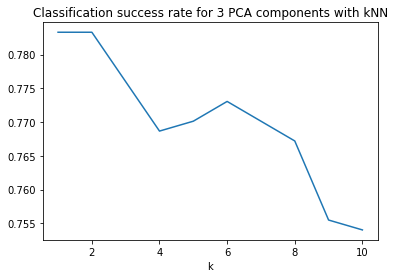

In [10]:
sns.lineplot(x=np.arange(1,11),y=scores[2])
plt.title('Classification success rate for 3 PCA components with kNN')
plt.xlabel('k')

Text(0.5, 0, 'k')

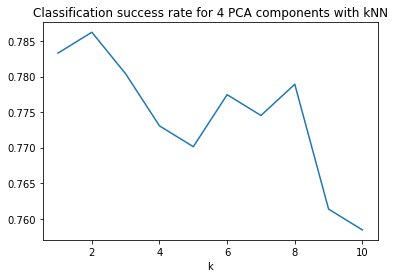

In [11]:
sns.lineplot(x=np.arange(1,11),y=scores[3])
plt.title('Classification success rate for 4 PCA components with kNN')
plt.xlabel('k')

Text(0.5, 0, 'k')

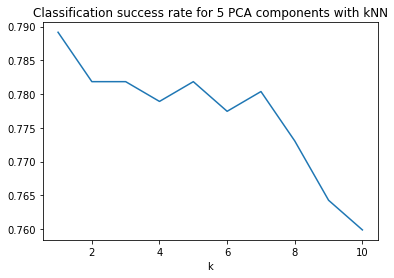

In [12]:
sns.lineplot(x=np.arange(1,11),y=scores[5])
plt.title('Classification success rate for 5 PCA components with kNN')
plt.xlabel('k')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_text

In [14]:
# Load in the dataset. (Thanks Izzy for the process)

data = pd.read_csv('cleaned_dummy_dataset.csv')           #Everything but labels
data_full = pd.read_csv('soybean_csv.csv')                #Has labels in "class" column
data['Class'] = data_full['class']                        #Add labels to clean dataset
data = data.loc[:,'plant-growth_abnorm':]                 #Dropping indexing column
data.tail()

,plant-growth_abnorm,leafspots-halo_no-yellow-halos,leafspots-marg_w-s-marg,leafspot-size_gt-1/8,leaf-mild_absent,stem-cankers_absent,canker-lesion_dk-brown-blk,fruiting-bodies_absent,fruiting-bodies_present,external-decay_absent,int-discolor_brown,int-discolor_none,fruit-pods_diseased,fruit-pods_norm,fruit-spots_absent,fruit-spots_colored,mold-growth_absent,roots_rotted,Class
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2-4-d-injury
679,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
680,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
681,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury
682,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,herbicide-injury


In [15]:
features = data.drop('Class', axis=1) 
target = data['Class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

# Define the hyperparameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

tree_rules = export_text(best_clf, feature_names=list(features.columns))
print("Decision Tree Rules:\n", tree_rules)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.89
Decision Tree Rules:
 |--- leafspot-size_gt-1/8 <= 0.50
|   |--- canker-lesion_dk-brown-blk <= 0.50
|   |   |--- int-discolor_brown <= 0.50
|   |   |   |--- stem-cankers_absent <= 0.50
|   |   |   |   |--- fruit-pods_norm <= 0.50
|   |   |   |   |   |--- fruiting-bodies_absent <= 0.50
|   |   |   |   |   |   |--- plant-growth_abnorm <= 0.50
|   |   |   |   |   |   |   |--- int-discolor_none <= 0.50
|   |   |   |   |   |   |   |   |--- class: 2-4-d-injury
|   |   |   |   |   |   |   |--- int-discolor_none >  0.50
|   |   |   |   |   |   |   |   |--- class: anthracnose
|   |   |   |   |   |   |--- plant-growth_abnorm >  0.50
|   |   |   |   |   |   |   |--- roots_rotted <= 0.50
|   |   |   |   |   |   |   |   |--- leaf-mild_absent <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: cyst-nematode
|   |   |   |   |   |   |   |   |--- leaf-mild_absent 

In [16]:
#using https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

#technique of loading in and making variables into numbers stolen from Izzy, lmk if youre cool with that
data = pd.read_csv('cleaned_dummy_dataset.csv')
data_full = pd.read_csv('cleansoybean_csv.csv')
data['Class'] = data_full['class']
data = data.loc[:,'plant-growth_abnorm':]
data.tail()

data_num = data.replace({False: 0, True: 1})
data_num = data_num.drop(columns=['Class'])
data_num



#making a proof that it works example
X = data_num.drop(['roots_rotted'],axis=1)
y = data_num['roots_rotted']

#running the logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
ModelEvalProcedure = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ModelAccuracyScores = cross_val_score(model, X, y, scoring='accuracy', cv=ModelEvalProcedure, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(ModelAccuracyScores), std(ModelAccuracyScores)))

#fit model+predict class of first observation
result = model.fit(X, y)
row = X.iloc[0:1, :]
yhat = model.predict_proba(row)
print('Predicted Probabilities: %s' % yhat[0])

yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Mean Accuracy: 0.969 (0.022)
Predicted Probabilities: [0.98163725 0.01836275]
Predicted Class: 0


In [17]:
#taking out rows with NAN values, not worth it to try to fill them in
dataNoNA = data.dropna()

n = pd.unique(dataNoNA['Class'])
#since there are only 15 unique values for class, the current plan is to assign each of them a number 0-14 

#changing the names of the diseases to corresponding numbers
dataNoNA.replace(to_replace="diaporthe-stem-canker",
           value="0")
dataNoNA.replace(to_replace="charcoal-rot",
           value="1")
dataNoNA.replace(to_replace="rhizoctonia-root-rot",
           value="2")
dataNoNA.replace(to_replace="phytophthora-rot",
           value="3")
dataNoNA.replace(to_replace="brown-stem-rot",
           value="4")
dataNoNA.replace(to_replace="powdery-mildew",
           value="5")
dataNoNA.replace(to_replace="downy-mildew",
           value="6")
dataNoNA.replace(to_replace="brown-spot",
           value="7")
dataNoNA.replace(to_replace="bacterial-blight",
           value="8")
dataNoNA.replace(to_replace="bacterial-pustule",
           value="9")
dataNoNA.replace(to_replace="purple-seed-stain",
           value="10")
dataNoNA.replace(to_replace="anthracnose",
           value="11")
dataNoNA.replace(to_replace="phyllosticta-leaf-spot",
           value="12")
dataNoNA.replace(to_replace="alternarialeaf-spot",
           value="13")
dataNoNA.replace(to_replace="frog-eye-leaf-spot",
           value="14")


#setting the variables to be considered in regression
Xclass = dataNoNA.drop(['Class'],axis=1)
yclass = dataNoNA['Class']

#checking to make sure that the shape is correct for the regression to run
print(Xclass.shape,yclass.shape)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, max_iter = 1000000)
CModelEvalProcedure = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
CModelAccuracyScores = cross_val_score(model, Xclass, yclass, scoring='accuracy', cv=ModelEvalProcedure, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(ModelAccuracyScores), std(ModelAccuracyScores)))

#fit model+predict class of first observation
result = model.fit(X, y)
row = X.iloc[0:1, :]
Cyhat = model.predict_proba(row)
print('Predicted Probabilities: %s' % Cyhat[0])

Cyhat = model.predict(row)
print('Predicted Class: %d' % Cyhat[0])

(562, 18) (562,)
Mean Accuracy: 0.969 (0.022)
Predicted Probabilities: [0.98163725 0.01836275]
Predicted Class: 0


In [18]:
from scipy.stats import ttest_rel

# Collect accuracy scores for all models
pca_accuracy = scores
tree_accuracy = [accuracy] * len(scores)
logistic_regression_accuracy = ModelAccuracyScores

# Ensure all arrays have the same length
min_len = min(len(pca_accuracy), len(tree_accuracy), len(logistic_regression_accuracy))


pca_accuracy = pca_accuracy[:min_len]
tree_accuracy = tree_accuracy[:min_len]
logistic_regression_accuracy = logistic_regression_accuracy[:min_len]



# Perform paired t-tests for all combinations of model accuracies
models = [
    ("PCA with kNN", pca_accuracy),
    ("Decision Tree", tree_accuracy),
    ("Logistic Regression", logistic_regression_accuracy)
]

for i in range(len(models)):
    for j in range(i + 1, len(models)):
        print()
        model1_name, model1_accuracies = models[i]
        model2_name, model2_accuracies = models[j]
        model1_accuracies = np.array(model1_accuracies).flatten()
        model1_accuracies = model1_accuracies[:min_len]


        # Perform paired t-test
        t_statistic, p_value = ttest_rel(model1_accuracies, model2_accuracies)

        # Interpret the result
        print(f"Comparing {model1_name} and {model2_name}:")
       
        if p_value < 0.05:
            if mean(model1_accuracies) > mean(model2_accuracies):
                print(f"{model1_name} is significantly more accurate than {model2_name}.")
            else:
                print(f"{model2_name} is significantly more accurate than {model1_name}.")
        else:
            print("There is no significant difference in mean accuracies between the two models.")



Comparing PCA with kNN and Decision Tree:
Decision Tree is significantly more accurate than PCA with kNN.

Comparing PCA with kNN and Logistic Regression:
Logistic Regression is significantly more accurate than PCA with kNN.

Comparing Decision Tree and Logistic Regression:
Logistic Regression is significantly more accurate than Decision Tree.
